## ANALYSE MULTIVARIER AVEC LSTM

# Introduction aux Réseaux de Neurones Récurrents Simples (RNN)

Les Réseaux de Neurones Récurrents (RNN) sont conçus pour traiter des données séquentielles comme des textes ou des séries temporelles. Contrairement aux réseaux neuronaux classiques, les RNN utilisent des connexions récurrentes pour se souvenir des informations passées.

## Architecture d'un RNN Simple

Un RNN simple se compose de neurones qui utilisent non seulement l'entrée actuelle, mais aussi leur sortie précédente pour produire une nouvelle sortie.

![Architecture d'un RNN simple](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Recurrent_neural_network_unfold.svg/1280px-Recurrent_neural_network_unfold.svg.png)
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Recurrent_neural_network)*

## Fonctionnement d'un RNN Simple

1. **Initialisation** : L'état caché est initialisé, souvent à zéro.
2. **Propagation** : À chaque instant t, l'état caché \( h_t \) est mis à jour en fonction de l'entrée actuelle \( x_t \) et de l'état caché précédent \( h_{t-1} \).

L'équation de mise à jour est généralement la suivante :
\[ h_t = \text{tanh}(W_{hh} h_{t-1} + W_{xh} x_t + b_h) \]
où \( W_{hh} \) et \( W_{xh} \) sont des matrices de poids, et \( b_h \) est un biais.

3. **Sortie** : La sortie du RNN à l'instant t peut être calculée à partir de l'état caché actuel \( h_t \).

## Applications des RNN Simples

Les RNN simples peuvent être utilisés pour diverses tâches de séquences, telles que :
- La classification de séquences (par exemple, analyse de sentiments)
- La génération de texte
- La prédiction de séries temporelles

## Avantages et Limitations

### Avantages
- **Mémoire à court terme** : Les RNN simples peuvent retenir les informations de quelques instants précédents, ce qui est utile pour les données séquentielles.

### Limitations
- **Vanishing Gradient** : Lors de l'entraînement des RNN, les gradients peuvent devenir très petits (ou très grands), ce qui rend difficile l'apprentissage des dépendances à long terme.
- **Mémoire limitée** : Les RNN simples ne sont pas bien adaptés pour capturer des dépendances à long terme dans les séquences. Des variantes comme les LSTM (Long Short-Term Memory) et les GRU (Gated Recurrent Unit) ont été développées pour surmonter ces limitations.


In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

#from datetime import datetime

In [2]:
#importation des données 
df = pd.read_pickle('C:/Users/user/Desktop/ProjetStage Datascience OCP Model & Dashbord Raymond/Back-End/Preprocessing/cleaned_data_cleaned_10min.pkl')
train_dates = df.index

In [ ]:
df["H_Power"]

In [4]:
df

,A_Pressure,A_Flow,A_Temperature,A_Level,B_Pressure,B_Flow,B_Temperature,C_Temp_in,C_Temp_out,C_Pressure_Drops,...,G_Pressure,G_Temp_in,G_Temp_out,G_Pressure_Drops,G_Level,H_Voltage,H_Frequency,H_Power_Factor,is_outlier,H_Power
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00,93.374496,263.985489,109.083012,79.929108,61.120478,246.806160,277.869904,413.608124,379.001602,922.249431,...,2.105505,18.592676,32.681240,184.365089,86.655159,10.055195,50.021124,0.823854,0.0,34.113321
2023-01-01 00:10,93.438599,261.998383,109.105118,79.993851,61.046787,247.323608,277.689514,413.687164,379.026367,924.249187,...,2.077016,18.608007,32.313290,184.402222,86.991905,10.056350,50.001119,0.825730,0.0,34.060003
2023-01-01 00:20,93.430435,261.857555,109.097333,79.998361,61.017930,247.323608,277.663298,413.681254,379.015909,924.154105,...,2.076835,18.600405,32.385280,184.399891,86.898018,10.056422,50.001081,0.828994,0.0,34.043475
2023-01-01 00:30,93.422272,261.716728,109.089548,80.002872,60.989073,247.323608,277.637082,413.675343,379.005451,924.059022,...,2.076654,18.592803,32.457270,184.397561,86.804131,10.056493,50.001044,0.832258,0.0,34.026946
2023-01-01 00:40,93.414108,261.575900,109.081763,80.007382,60.960216,247.323608,277.610866,413.669432,378.994994,923.963939,...,2.076473,18.585201,32.529260,184.395230,86.710244,10.056565,50.001006,0.835521,0.0,34.010417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31 23:10,93.243153,262.878845,108.915417,79.993402,61.418925,246.402817,278.263806,416.145343,381.110254,936.889435,...,2.185054,18.459573,32.596152,184.372549,87.197482,10.059822,50.056733,0.865749,0.0,33.584782
2023-10-31 23:20,93.208112,263.075386,108.935486,79.977621,61.412834,246.633015,278.253450,415.723189,380.738540,933.920851,...,2.163490,18.454563,32.415570,184.473058,87.172283,10.060196,50.056450,0.867168,0.0,33.539358
2023-10-31 23:30,93.173071,263.271927,108.955555,79.961840,61.406743,246.863213,278.243094,415.301035,380.366826,930.952267,...,2.141926,18.449554,32.234987,184.573566,87.147083,10.060571,50.056166,0.868588,0.0,33.493935


In [5]:
df.describe

<bound method NDFrame.describe of                   A_Pressure      A_Flow  A_Temperature    A_Level  \
Date                                                                 
2023-01-01 00:00   93.374496  263.985489     109.083012  79.929108   
2023-01-01 00:10   93.438599  261.998383     109.105118  79.993851   
2023-01-01 00:20   93.430435  261.857555     109.097333  79.998361   
2023-01-01 00:30   93.422272  261.716728     109.089548  80.002872   
2023-01-01 00:40   93.414108  261.575900     109.081763  80.007382   
...                      ...         ...            ...        ...   
2023-10-31 23:10   93.243153  262.878845     108.915417  79.993402   
2023-10-31 23:20   93.208112  263.075386     108.935486  79.977621   
2023-10-31 23:30   93.173071  263.271927     108.955555  79.961840   
2023-10-31 23:40   93.138030  263.468468     108.975624  79.946060   
2023-10-31 23:50   93.102989  263.665009     108.995693  79.930279   

                  B_Pressure      B_Flow  B_Temperature

Ici nous rechercher le 8 feauture les plus fortement correrler avec ma target H_Power

<Axes: xlabel='Date'>

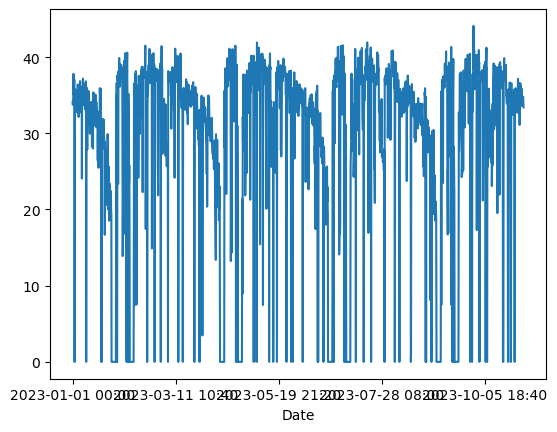

In [42]:
df["H_Power"].plot()

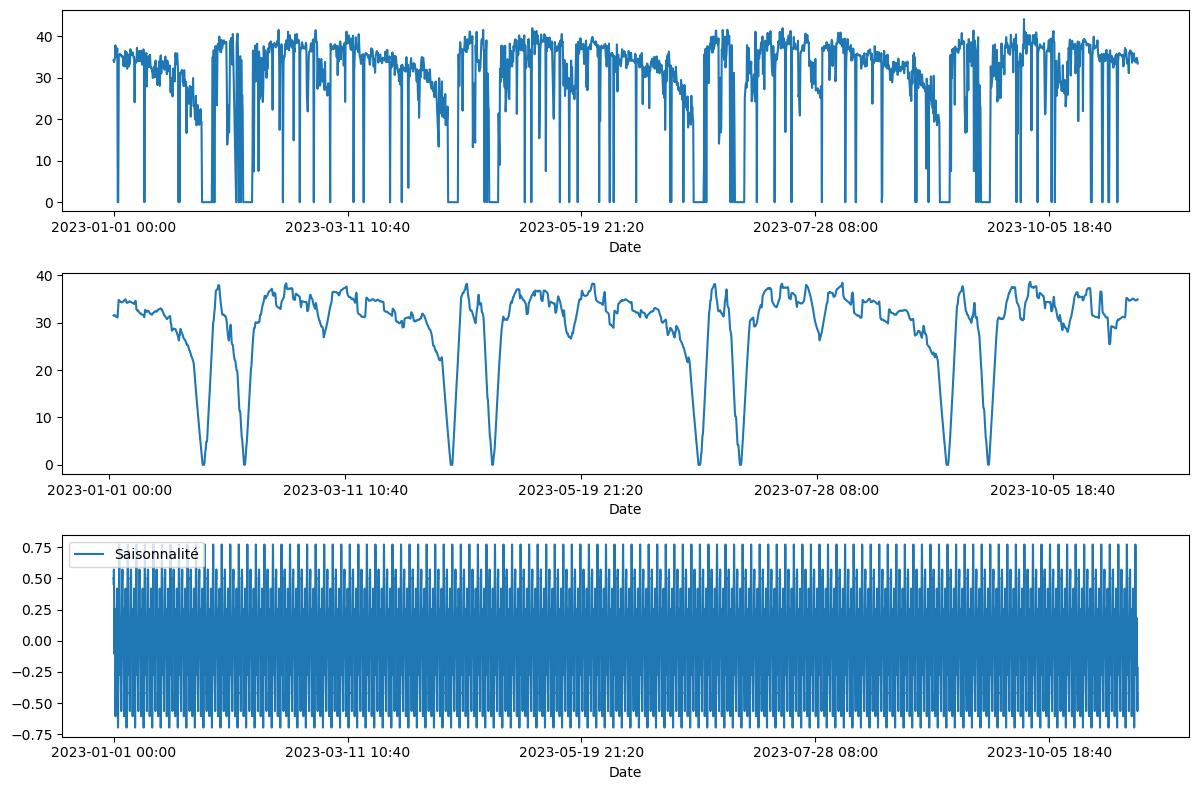

In [43]:
import pandas as pd
import statsmodels.api as sm

# Décomposition en tendance, saisonnalité et résidu
period = 365 
decomposition = sm.tsa.seasonal_decompose(df['H_Power'], model='additive', period=period)

# Tracer les différentes composantes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1, label='Observé')
decomposition.trend.plot(ax=ax2, label='Tendance')
decomposition.seasonal.plot(ax=ax3, label='Saisonnalité')
plt.tight_layout()
plt.legend()
plt.show()

Graphique du haut : On observe des fluctuations régulières de H_Power au cours du temps, avec des pics et des creux qui se répètent de manière cyclique. Ces variations suggèrent l'existence d'un pattern saisonnier.

Graphique du milieu : Ce graphique semble être une version lissée du premier, mais on y distingue toujours clairement les mêmes cycles. Cela renforce l'hypothèse d'une saisonnalité.

Graphique du bas : Ce graphique représente la composante saisonnière isolée. Les oscillations régulières autour de zéro confirment la présence d'un phénomène saisonnier.

Les 8 caractéristiques les plus corrélées avec H_Power (en pourcentage) :
                       H_Power  H_Power_Factor   H_Voltage  H_Frequency  \
H_Power             100.000000       90.884737   90.823522    89.874680   
H_Power_Factor       90.884737      100.000000   99.563182    99.430254   
H_Voltage            90.823522       99.563182  100.000000    99.759436   
H_Frequency          89.874680       99.430254   99.759436   100.000000   
F_Rotation_Speed     89.874680       99.430254   99.759436   100.000000   
B_Flow               89.315363       90.525123   90.449999    90.530696   
A_Flow               88.213035       88.860560   88.349907    88.440210   
E_Pressure_Drops_1   87.974531       89.011588   89.275934    89.272515   

                    F_Rotation_Speed      B_Flow      A_Flow  \
H_Power                    89.874680   89.315363   88.213035   
H_Power_Factor             99.430254   90.525123   88.860560   
H_Voltage                  99.759436   90.449999   88.3499

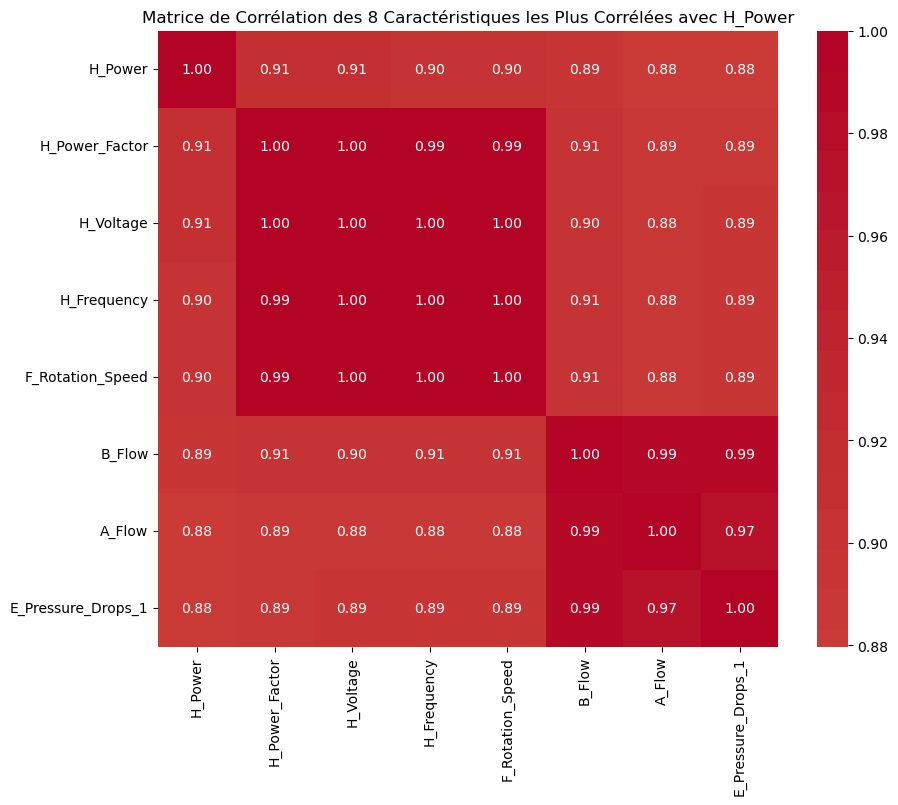

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculer la matrice de corrélation
correlation_matrix = df.corr()

# Extraire les corrélations avec H_Power
correlation_with_target = correlation_matrix['H_Power'].sort_values(ascending=False)

# Extraire les 8 caractéristiques les plus corrélées
top_8_features = correlation_with_target.head(8).index

# Créer une sous-matrice de corrélation avec ces 8 caractéristiques
top_8_correlation_matrix = correlation_matrix.loc[top_8_features, top_8_features]

# Convertir en pourcentage (pour l'affichage, pas nécessaire pour le heatmap)
top_8_correlation_percentage = top_8_correlation_matrix * 100

# Afficher les résultats des caractéristiques les plus corrélées en pourcentage
print("Les 8 caractéristiques les plus corrélées avec H_Power (en pourcentage) :")
print(top_8_correlation_percentage)

# Visualiser la sous-matrice de corrélation des 8 caractéristiques les plus corrélées
plt.figure(figsize=(10, 8))
sns.heatmap(top_8_correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation des 8 Caractéristiques les Plus Corrélées avec H_Power')
plt.show()


Maintenant a partis de ces 8 feature la valeur dans le features de H_Power 
cols = ['H_Power','H_Power_Factor','H_Voltage','F_Rotation_Speed ','H_Frequency ','B_Flow','A_Flow','E_Pressure_Drops_1']

In [45]:
cols = ['H_Power','H_Power_Factor','H_Voltage','F_Rotation_Speed','H_Frequency','B_Flow','A_Flow','E_Pressure_Drops_1']
df_train= df[cols].astype(float)

In [46]:
df_train['H_Power']

Date
2023-01-01 00:00    34.113321
2023-01-01 00:10    34.060003
2023-01-01 00:20    34.043475
2023-01-01 00:30    34.026946
2023-01-01 00:40    34.010417
                      ...    
2023-10-31 23:10    33.584782
2023-10-31 23:20    33.539358
2023-10-31 23:30    33.493935
2023-10-31 23:40    33.448511
2023-10-31 23:50    33.403088
Name: H_Power, Length: 43776, dtype: float64

In [47]:
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
import numpy as np  

# Supposons que df_train soit ce DataFrame d'origine  
# Séparer H_Power des autres colonnes  
h_power = df_train['H_Power'].values  # Extraire la colonne H_Power  
df_train_without_h_power = df_train.drop(columns=['H_Power'])  # Supprimer H_Power du DataFrame  

# Normalisation des données  
scaler_x = StandardScaler()  
scaler_y = StandardScaler()  

# Ajuster et transformer les données d'entraînement (sans H_Power)  
df_scaled = scaler_x.fit_transform(df_train_without_h_power)  

# Assurez-vous que df_scaled est un tableau NumPy  
df_scaled = np.array(df_scaled)  

X_train = []  
Y_train = []  

n_future = 1  # Nombre de jours à prédire dans le futur  
n_past = 14   # Nombre de jours dans le passé sur lesquels on se base pour prédire  

for i in range(n_past, len(df_scaled) - n_future):  
    X_train.append(df_scaled[i - n_past:i])  # Utilisez append sur la liste  
    Y_train.append(h_power[i + n_future - 1])  # Prendre la valeur de H_Power à l'index i + n_future - 1  

# Convertir les listes en tableaux NumPy  
X_train = np.array(X_train)  
Y_train = np.array(Y_train).reshape(-1, 1)  # Assurez-vous que Y_train est 2D pour le scaler  

# Normaliser Y_train  
Y_train_scaled = scaler_y.fit_transform(Y_train)  

# Diviser les données en ensembles d'entraînement et de test  
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_train, Y_train_scaled, test_size=0.1, shuffle=False)  

print('X_train shape == {}.'.format(X_train_scaled.shape))  
print('Y_train shape == {}.'.format(y_train_scaled.shape))

X_train shape == (39384, 14, 7).
Y_train shape == (39384, 1).


# Introduction aux Long Short-Term Memory (LSTM)

Les LSTM (Long Short-Term Memory) sont une variante des Réseaux de Neurones Récurrents (RNN) conçue pour mieux gérer les dépendances à long terme dans les données séquentielles. Ils ont été introduits pour surmonter le problème du gradient évanescent, qui limite la capacité des RNN simples à apprendre des séquences longues.

## Architecture d'un LSTM

Un LSTM est composé de cellules de mémoire qui maintiennent l'état interne sur de longues périodes. Chaque cellule LSTM a trois portes (gates) qui régulent le flux d'informations :
- **Porte d'entrée (input gate)** : contrôle quelles informations de l'entrée actuelle doivent être ajoutées à l'état de la cellule.
- **Porte d'oubli (forget gate)** : contrôle quelles informations de l'état de la cellule doivent être oubliées.
- **Porte de sortie (output gate)** : contrôle quelles informations de l'état de la cellule doivent être sorties.

![Architecture d'un LSTM](https://upload.wikimedia.org/wikipedia/commons/3/3b/The_LSTM_cell.png)
*Source: [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)*

## Fonctionnement d'un LSTM

1. **Initialisation** : Au temps t=0, l'état de la cellule et l'état caché sont initialisés (souvent à zéro).
2. **Propagation** : À chaque instant t, les portes d'entrée, d'oubli et de sortie déterminent comment l'état de la cellule et l'état caché sont mis à jour.



## Applications des LSTM

Les LSTM sont utilisés pour diverses tâches séquentielles, notamment :
- La génération de texte
- La traduction automatique
- La reconnaissance vocale
- La prévision de séries temporelles

## Avantages et Limitations

### Avantages
- **Mémoire à long terme** : Les LSTM peuvent capturer des dépendances à long terme dans les séquences.
- **Gradient évanescent** : Les LSTM atténuent le problème du gradient évanescent, facilitant ainsi l'apprentissage sur des séquences longues.

### Limitations
- **Complexité** : Les LSTM sont plus complexes et ont plus de paramètres que les RNN simples, ce qui peut entraîner un temps de calcul plus long et nécessiter plus de données pour l'entraînement.


L'image ci-dessus représente une cellule LSTM (Long Short-Term Memory), qui est un type spécifique de couche dans un réseau de neurones récurrent (RNN). ce code implémente un modèle avec plusieurs couches LSTM. Voici comment l'image se rapporte au code et comment l'utiliser pour expliquer le modèle :

1. Structure LSTM : 
   L'image montre la structure interne d'une cellule LSTM. Dans du code, chaque `LSTM(units=...)` crée une couche contenant plusieurs de ces cellules.

2. Entrées et sorties :
   - `ct-1` et `ht-1` dans l'image représentent l'état précédent de la cellule.
   - `Xt` est l'entrée actuelle.
   - `ct` et `ht` sont les sorties.
   Dans ce modèle, les entrées et sorties sont gérées automatiquement entre les couches LSTM.

3. Opérations internes :
   - Les σ (sigma) dans l'image représentent des fonctions d'activation sigmoid.
   - Les "tanh" sont des fonctions d'activation tangente hyperbolique.
   - Les opérations "x" et "+" sont des multiplications et additions point par point.
   Ces opérations sont intégrées dans chaque unité LSTM de vos couches.

4. Couches multiples :
   ce code utilise trois couches LSTM (`LSTM(units=8)`, `LSTM(units=4)`, `LSTM(units=2)`). Chaque couche contient plusieurs cellules comme celle montrée dans l'image.

5. Dropout :
   Après chaque couche LSTM,  nous avons une couche `Dropout(0.2)`. Bien que non représentée dans l'image, cette technique aide à prévenir le surapprentissage en désactivant aléatoirement 20% des neurones pendant l'entraînement.

6. Couche de sortie :
   ce `Dense(units=1)` finale n'est pas représentée dans l'image, mais elle prend la sortie de la dernière LSTM pour produire la prédiction finale.

7. Apprentissage :
   L'image montre la structure d'une seule passe à travers une cellule LSTM. ce code `model.fit(...)` entraîne le réseau sur plusieurs époques, ajustant les poids internes pour minimiser la perte (loss).

8. Monitoring :
   ce code inclut un `EarlyStopping` callback et trace les courbes de perte d'entraînement et de validation, ce qui vous permet de surveiller et d'optimiser les performances du modèle au fil du temps.

l'image fournit un aperçu détaillé du fonctionnement interne d'une seule unité LSTM, tandis que ce code implémente un réseau plus large composé de multiples couches de ces unités, conçu pour apprendre et prédire à partir de séquences de données temporelles.


In [48]:
model = Sequential()

# Add LSTM layers with dropout
model.add(LSTM(units=8, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=4, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=2, return_sequences=False))
model.add(Dropout(0.2))

# Add a dense output layer
model.add(Dense(units=1))


model.summary()

c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 14, 8)          │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 8)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 14, 4)          │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 14, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 2)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 779 (3.04 KB)

 Trainable params: 779 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.2154 - mean_absolute_error: 0.2154 - val_loss: 0.2820 - val_mean_absolute_error: 0.2820
Epoch 2/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - val_loss: 0.2808 - val_mean_absolute_error: 0.2808
Epoch 3/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.2151 - mean_absolute_error: 0.2151 - val_loss: 0.2893 - val_mean_absolute_error: 0.2893
Epoch 4/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - val_loss: 0.2760 - val_mean_absolute_error: 0.2760
Epoch 5/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - val_loss: 0.2827 - val_mean_absolute_error: 0.2827
Epoch 6/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - loss: 0.2162 - mean_absolute_error: 0.2162 - val_loss: 0.2786 - val_mean_absolute_error: 0.2786
Epoch 7/50
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.2160 - mea

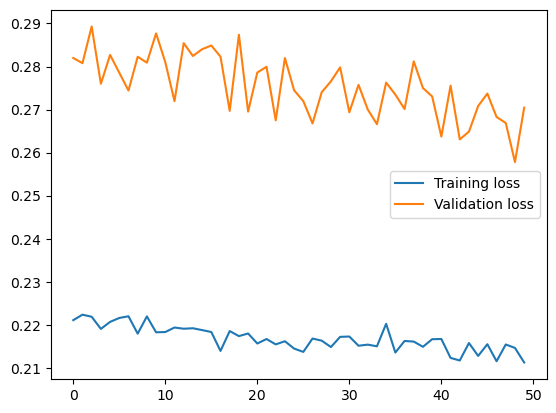

In [68]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=7,
                                                mode='min')
model.compile(loss=tf.losses.MeanAbsoluteError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

# Measure training time
start_time = time.time()


history=model.fit(X_train_scaled, y_train_scaled,epochs=50,
                            validation_split=0.1,
                            shuffle=False,
                            callbacks=[early_stopping])

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# End training time
end_time = time.time()
training_time = end_time-start_time

In [69]:
training_time_seconds = training_time  
# Conversion des secondes en minutes
training_time_minutes = training_time_seconds / 60

print('Training time est de :', training_time_minutes, 'minutes')

Training time est de : 14.978638541698455 minutes


In [71]:
# Extraction des paramètres des couches LSTM et Dense
lstm_1_weights = model.layers[0].get_weights()
lstm_2_weights = model.layers[2].get_weights()
lstm_3_weights = model.layers[4].get_weights()
dense_weights = model.layers[6].get_weights()

print("Poids et biais de la première couche LSTM:", lstm_1_weights)
print("Poids et biais de la deuxième couche LSTM:", lstm_2_weights)
print("Poids et biais de la troisième couche LSTM:", lstm_3_weights)
print("Poids et biais de la couche Dense:", dense_weights)

Poids et biais de la première couche LSTM: [array([[-0.2801517 ,  0.19822617,  0.5534868 , -0.30914956, -0.44712177,
        -0.4697512 , -0.3715976 , -1.2164727 , -0.71871346, -0.40730214,
         0.47864106, -0.20425257, -0.14314742,  0.19197854, -0.13006502,
        -1.302721  ,  0.04338331, -1.441859  , -0.42812523, -0.2615454 ,
        -0.27527443, -0.1764327 , -0.5612156 ,  0.05407706, -0.8133405 ,
         0.46205106, -0.36936846, -0.5110576 , -0.05782282,  0.53618264,
        -0.6467105 , -0.4517887 ],
       [-0.33222112, -1.0506884 ,  1.5562431 , -0.74001086, -0.10726067,
        -0.36116162, -1.0985084 ,  1.1284852 , -0.12209219, -0.8785865 ,
         1.2638458 , -0.68258065, -1.1955377 ,  0.02323021, -0.9471858 ,
         1.0419766 , -2.0041127 ,  0.6857288 , -1.8939266 ,  0.9666012 ,
        -2.3042083 , -0.41640508,  0.1266755 , -1.9379035 ,  0.13824043,
         0.4474484 ,  1.1391094 , -0.9616283 ,  0.8942579 , -0.58332527,
        -0.73060966, -0.38872626],
       [ 2

### Les hyperparamètres du model

Les hyperparamètres sont les paramètres que j'ai défini avant l'entraînement du modèle.
* **optimizer** : 'adam'
* **loss** : 'mean_squared_error'
* **units** : nombre d'unités dans chaque couche LSTM (8, 4, 2)
* **dropout rate** : 0.2
* **return_sequences** : True ou False selon la couche LSTM
* **time\_step** : 1008 (1 semaine)

In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Prédiction sur l'ensemble de test
predictions_scaled = model.predict(X_test_scaled)

# Inverser la normalisation des prédictions en utilisant scaler_y
# Assurez-vous que predictions_scaled a la forme correcte
predictions = scaler_y.inverse_transform(predictions_scaled)

# Inverser la normalisation de y_test_scaled
y_test = scaler_y.inverse_transform(y_test_scaled)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
rmae = mae / np.mean(y_test)  # Relative MAE
r2 = r2_score(y_test, predictions)

# Afficher les métriques
print("Metrics for LSTM:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Relative Mean Absolute Error (RMAE):", rmae)
print("R-squared (R2):", r2)


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Metrics for LSTM:
Mean Squared Error (MSE): 4.900882089762321
Root Mean Squared Error (RMSE): 2.213793596919623
Mean Absolute Error (MAE): 1.5105921177540493
Relative Mean Absolute Error (RMAE): 0.04602628208841694
R-squared (R2): 0.9269035185986265


In [73]:
y_test

array([[38.42819624],
       [38.39130635],
       [38.35441647],
       ...,
       [33.53935826],
       [33.49393487],
       [33.44851148]])

In [74]:
df_scaled

array([[0.23187468, 0.35292481, 0.37220522, ..., 0.66228573, 0.67033335,
        0.39533131],
       [0.23707242, 0.35330933, 0.37084734, ..., 0.67065022, 0.64015235,
        0.40493913],
       [0.2461129 , 0.35333316, 0.37084478, ..., 0.67065022, 0.63801341,
        0.40328277],
       ...,
       [0.35579155, 0.35471456, 0.37458373, ..., 0.66320798, 0.65949547,
        0.41658175],
       [0.35972399, 0.35483923, 0.37456448, ..., 0.6669291 , 0.66248061,
        0.41482298],
       [0.36365644, 0.35496391, 0.37454523, ..., 0.67065022, 0.66546576,
        0.41306422]])

In [77]:
df = scaler_x.inverse_transform(df_scaled)  
df


array([[8.23854059e-01, 1.00551950e+01, 3.00126746e+03, ...,
        2.46806160e+02, 2.63985489e+02, 1.73610855e+02],
       [8.25730443e-01, 1.00563500e+01, 3.00006714e+03, ...,
        2.47323608e+02, 2.61998383e+02, 1.74025238e+02],
       [8.28994058e-01, 1.00564216e+01, 3.00006488e+03, ...,
        2.47323608e+02, 2.61857555e+02, 1.73953800e+02],
       ...,
       [8.68588045e-01, 1.00605710e+01, 3.00336997e+03, ...,
        2.46863213e+02, 2.63271927e+02, 1.74527382e+02],
       [8.70007657e-01, 1.00609455e+01, 3.00335295e+03, ...,
        2.47093410e+02, 2.63468468e+02, 1.74451527e+02],
       [8.71427268e-01, 1.00613200e+01, 3.00333594e+03, ...,
        2.47323608e+02, 2.63665009e+02, 1.74375671e+02]])

In [78]:
import pandas as pd
import numpy as np

# Inverser la normalisation
df_inverse = df

# Créer un DataFrame à partir des valeurs inversées
df_combined_inverse = pd.DataFrame(df_inverse, columns=df_train.drop(columns=['H_Power']).columns)

# Vérifier les longueurs
df_inverse_length = len(df_combined_inverse)
h_power_length = len(h_power)

print("Longueur de df_combined_inverse : ", df_inverse_length)
print("Longueur de h_power : ", h_power_length)

# Ajuster la sélection pour correspondre à la longueur du DataFrame inversé
start_index = n_past
end_index = start_index + df_inverse_length

# Vérifier si la sélection est dans les limites de h_power
if start_index < h_power_length and end_index <= h_power_length:
    h_power_subset = h_power[start_index:end_index]
elif end_index > h_power_length:
    # Ajuster la fin si elle dépasse la longueur disponible
    end_index = h_power_length
    h_power_subset = h_power[start_index:end_index]
    # Ajuster df_combined_inverse pour correspondre à la longueur de h_power_subset
    df_combined_inverse = df_combined_inverse.iloc[:len(h_power_subset)]
else:
    raise ValueError("La longueur des données h_power est insuffisante pour la sélection demandée.")

# Ajouter la colonne H_Power
df_combined_inverse['H_Power'] = h_power_subset

# Afficher les premières lignes
print(df_combined_inverse.head())




Longueur de df_combined_inverse :  43776
Longueur de h_power :  43776
   H_Power_Factor  H_Voltage  F_Rotation_Speed  H_Frequency      B_Flow  \
0        0.823854  10.055195       3001.267456    50.021124  246.806160   
1        0.825730  10.056350       3000.067139    50.001119  247.323608   
2        0.828994  10.056422       3000.064877    50.001081  247.323608   
3        0.832258  10.056493       3000.062616    50.001044  247.323608   
4        0.835521  10.056565       3000.060354    50.001006  247.323608   

       A_Flow  E_Pressure_Drops_1    H_Power  
0  263.985489          173.610855  33.845130  
1  261.998383          174.025238  33.828601  
2  261.857555          173.953800  33.812072  
3  261.716728          173.882361  33.795544  
4  261.575900          173.810923  33.779015  


In [83]:
n_days_for_prediction = 1080  #Nombre de périodes de 10 minutes dans une semaine

# Définir la date de départ pour la prédiction
start_date = pd.Timestamp('2023-11-01 00:00:00')

predict_period_dates1 = pd.date_range(start=start_date, periods=n_days_for_prediction, freq="10min").tolist()

print(len(predict_period_dates1))

10080


Longueur de predict_period_dates1 : 10080
Longueur de y_test : 1008
Longueur de predictions : 1008


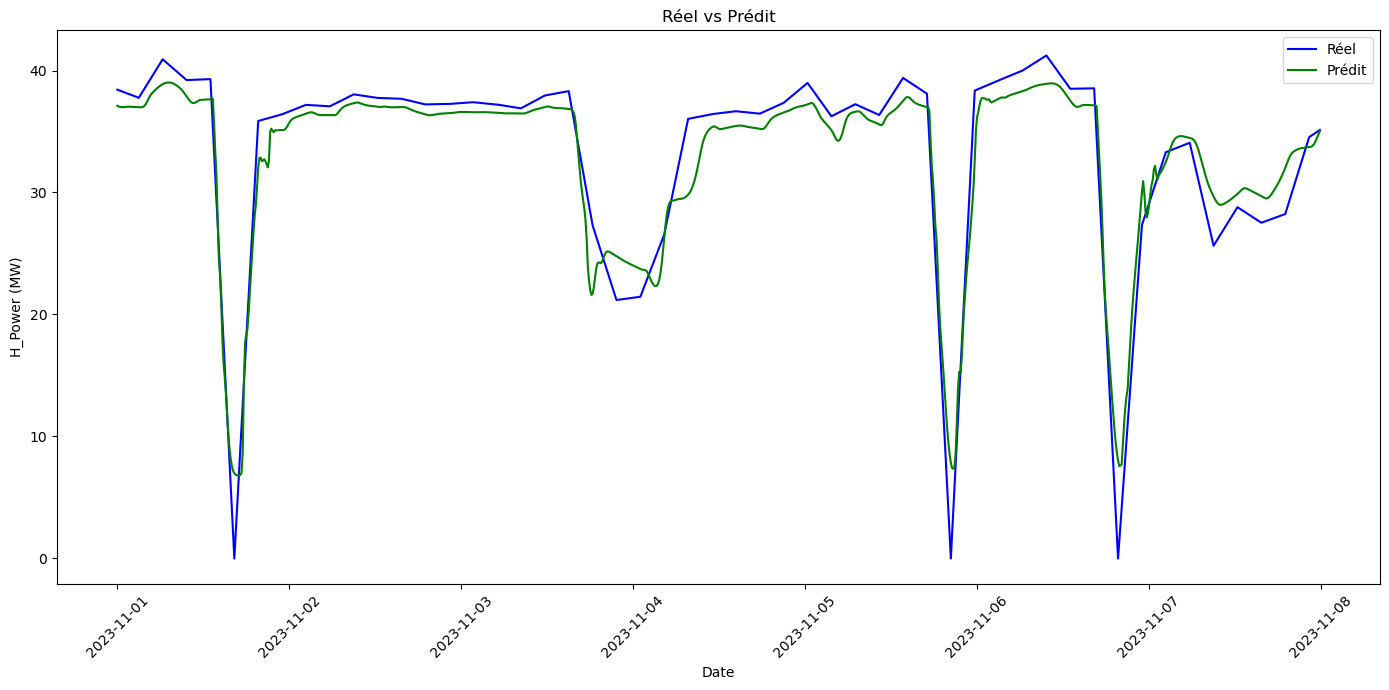

In [85]:
import numpy as np  
import matplotlib.pyplot as plt  

# Imprimer les longueurs pour le dépannage  
print("Longueur de predict_period_dates1 :", len(predict_period_dates1))  
print("Longueur de y_test :", len(y_test))  
print("Longueur de predictions :", len(predictions))  

# Découper y_test pour ne garder que les 1008 premiers éléments  
y_test = y_test[:1008]  # Prendre les 1008 premiers éléments de y_test  
predictions = predictions[:1008]  # Assurez-vous que predictions a également la même longueur  

# Visualiser les prédictions par rapport aux données réelles  
plt.figure(figsize=(14, 7))  
plt.plot(predict_period_dates1[:1008], y_test, color='blue', label='Réel')  
plt.plot(predict_period_dates1[:1008], predictions, color='green', label='Prédit')  
plt.title('Réel vs Prédit')  
plt.xlabel('Date')  
plt.ylabel('H_Power (MW)')  
plt.legend()  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

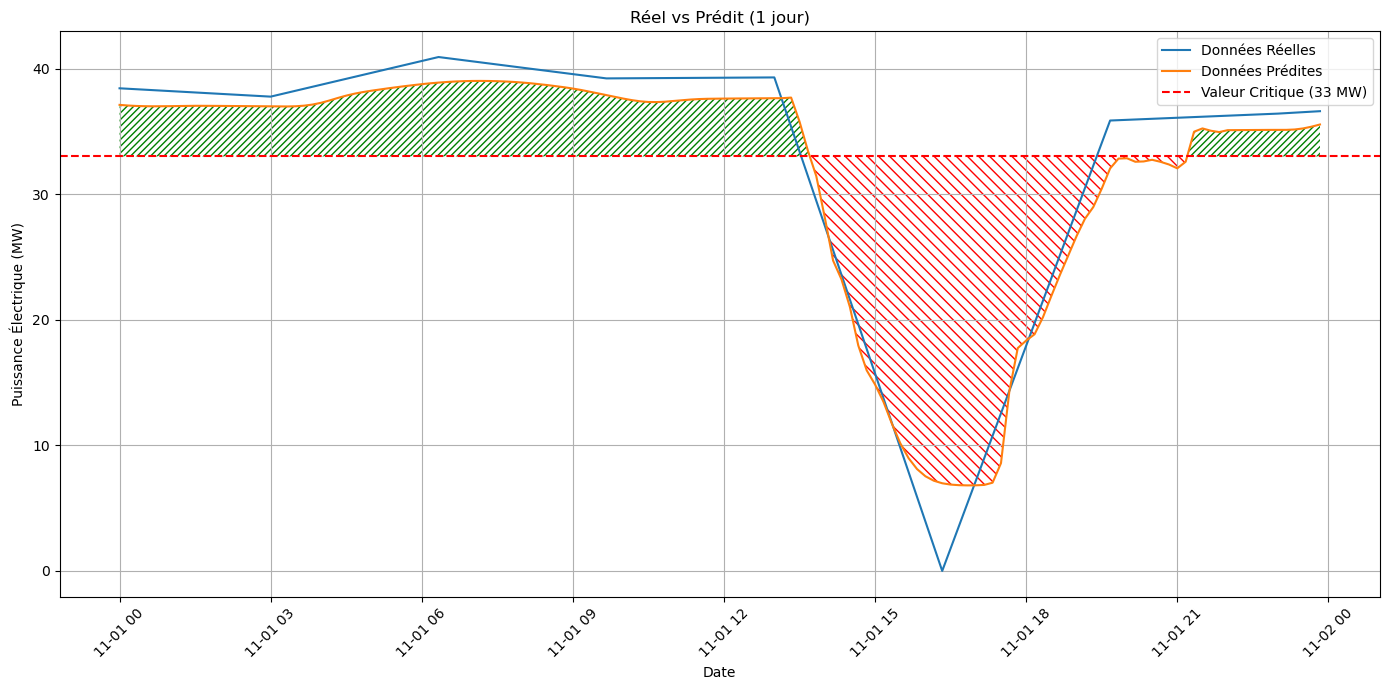

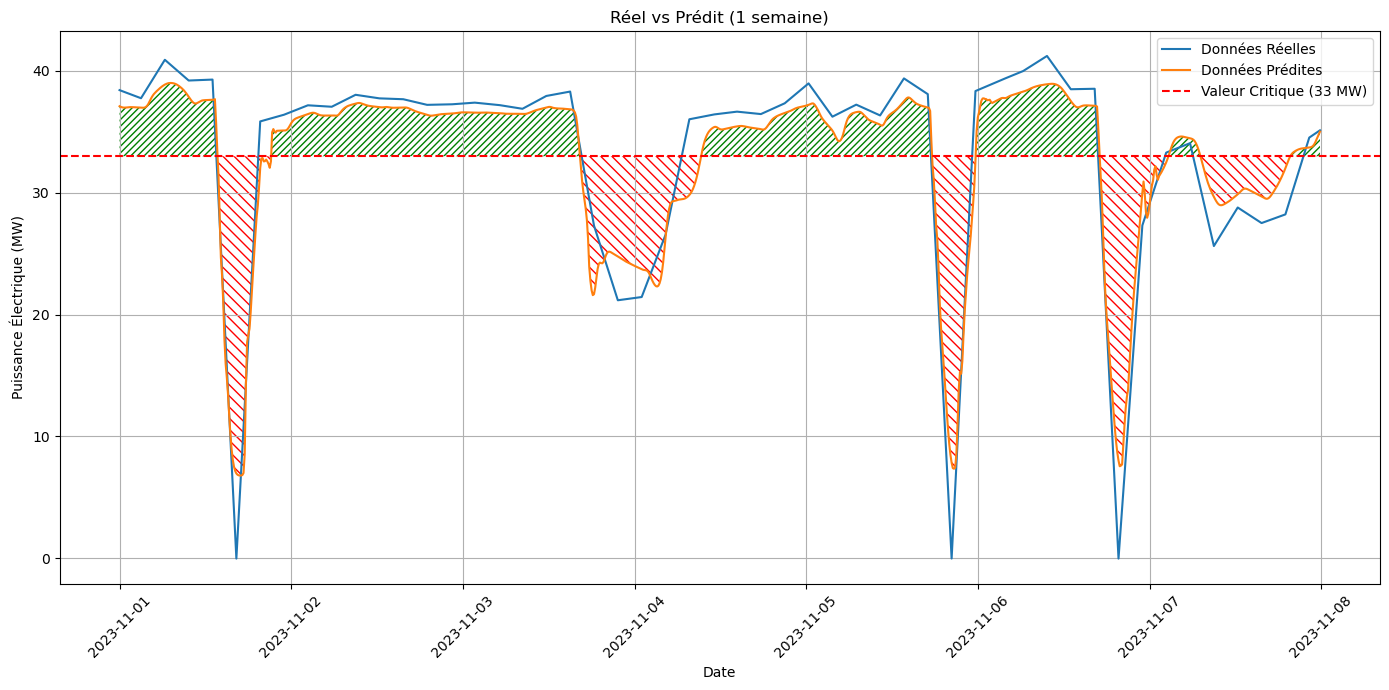

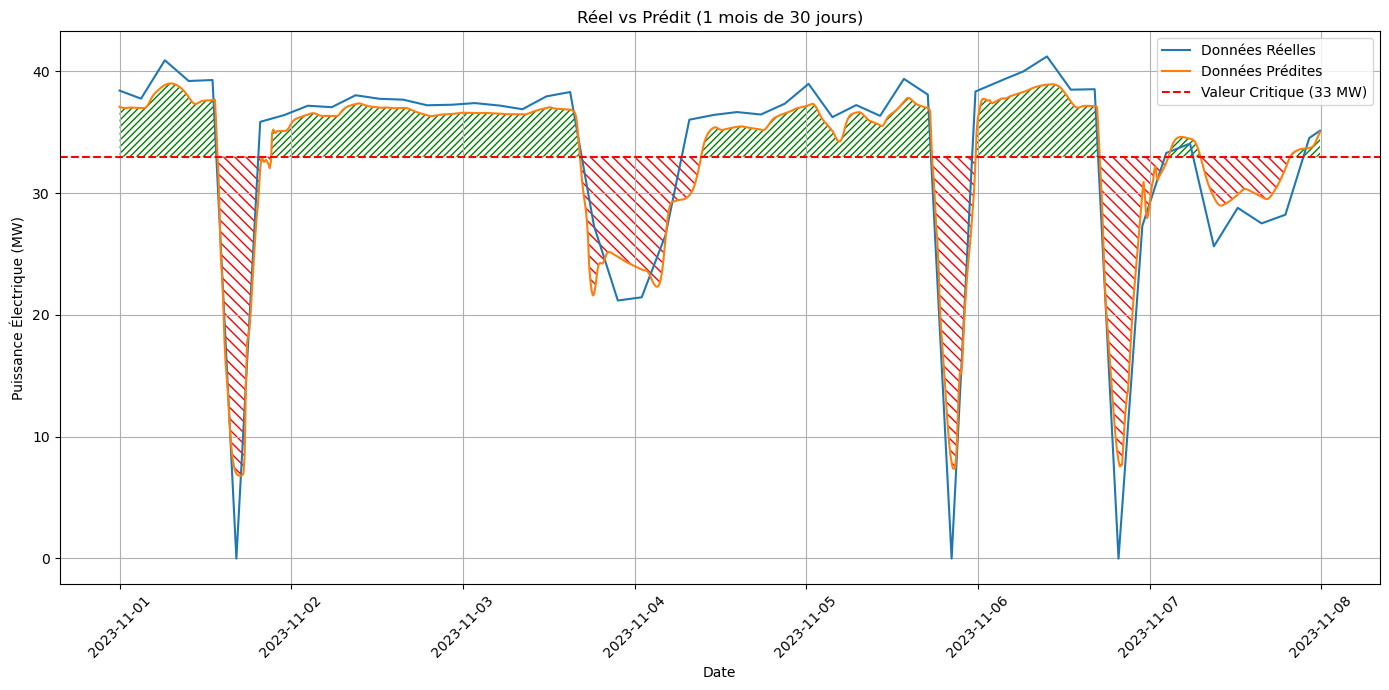

Les graphiques avancés ont été générés et affichés.


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import date2num
%matplotlib inline

def create_advanced_prediction_plot(dates, real, predicted, title, critical_value=33):
    plt.figure(figsize=(14, 7))
    
    # Plot real data
    sns.lineplot(x=dates, y=real, label='Données Réelles')
    
    # Plot predicted data
    sns.lineplot(x=dates, y=predicted, label='Données Prédites')
    
    # Add critical value line
    plt.axhline(y=critical_value, color='red', linestyle='--', label=f'Valeur Critique ({critical_value} MW)')
    
    # Add hatching for predicted data above and below the critical value
    plt.fill_between(
        dates, predicted, critical_value,
        where=(predicted >= critical_value),
        interpolate=True, color='none', hatch='/////', edgecolor='green', linewidth=0
    )
    plt.fill_between(
        dates, predicted, critical_value,
        where=(predicted < critical_value),
        interpolate=True, color='none', hatch='\\\\\\', edgecolor='red', linewidth=0
    )
    
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Puissance Électrique (MW)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assurez-vous que toutes les listes ont la même longueur
min_length = min(len(predict_period_dates1), len(y_test), len(predictions))
predict_period_dates1 = predict_period_dates1[:min_length]
y_test = y_test[:min_length]
predictions = predictions[:min_length]

# Convertir les données en arrays unidimensionnels si nécessaire
predict_period_dates1 = np.array(predict_period_dates1).flatten()
y_test = np.array(y_test).flatten()
predictions = np.array(predictions).flatten()

# Créer un DataFrame pour faciliter le découpage
df = pd.DataFrame({
    'date': pd.to_datetime(predict_period_dates1),
    'real': y_test,
    'predicted': predictions
})

# Calcul du nombre de points pour chaque période
points_per_day = 24 * 6  # 144 points par jour (intervalles de 10 minutes)
points_per_week = 7 * points_per_day
points_per_month = 28 * points_per_day  # Considérant un mois de 30 jours

# 1 jour (144 points pour des intervalles de 10 minutes)
df_day = df.head(points_per_day)
create_advanced_prediction_plot(df_day['date'], df_day['real'], df_day['predicted'], 'Réel vs Prédit (1 jour)')

# 1 semaine (1008 points)
df_week = df.head(points_per_week)
create_advanced_prediction_plot(df_week['date'], df_week['real'], df_week['predicted'], 'Réel vs Prédit (1 semaine)')

# 1 mois (4320 points pour un mois de 30 jours)
df_month = df.head(points_per_month)
create_advanced_prediction_plot(df_month['date'], df_month['real'], df_month['predicted'], 'Réel vs Prédit (1 mois de 30 jours)')

print("Les graphiques avancés ont été générés et affichés.")


In [89]:
df

,date,real,predicted
0,2023-11-01 00:00:00,38.428196,37.106308
1,2023-11-01 00:10:00,38.391306,37.056091
2,2023-11-01 00:20:00,38.354416,37.021290
3,2023-11-01 00:30:00,38.317527,37.001770
4,2023-11-01 00:40:00,38.280637,36.993958
...,...,...,...
1003,2023-11-07 23:10:00,34.862926,34.130543
1004,2023-11-07 23:20:00,34.929298,34.344612
1005,2023-11-07 23:30:00,34.995671,34.578827
1006,2023-11-07 23:40:00,35.062044,34.810200
